In [11]:
import sounddevice as sd
from scipy.io.wavfile import write

def record_audio(duration=5, sr=44100, channels=2, filename="output.wav"):
    print(f"Audioning davomiligi {duration} secund...")
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=channels, dtype="float32")
    sd.wait()
    write(filename, sr, recording)
    print(f"Audio muvofaqatli saqlandi and saqlangan joyi {filename}")

record_audio(duration=5, filename="audio.wav")


Recording audio for 5 seconds...
Audio recorded successfully and saved as recorded_audio.wav


In [2]:
import pyaudio
import wave

def record_audio(file_path, duration=5, rate=44100, chunk=1024, channels=1, format=pyaudio.paInt16):
    audio = pyaudio.PyAudio()
    stream = audio.open(format=format, channels=channels,
                        rate=rate, input=True,
                        frames_per_buffer=chunk)
    print("Recording started...")
    frames = []
    for i in range(0, int(rate / chunk * duration)):
        data = stream.read(chunk)
        frames.append(data)
    print("Recording finished...")
    stream.stop_stream()
    stream.close()
    audio.terminate()
    wf = wave.open(file_path, 'wb')
    wf.setnchannels(channels)
    wf.setsampwidth(audio.get_sample_size(format))
    wf.setframerate(rate)
    wf.writeframes(b''.join(frames))
    wf.close()

# Test
for i in range(10):
    file_path = f"audio{i}.wav"
    record_audio(file_path)


Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...
Recording started...
Recording finished...


In [5]:
import librosa
import numpy as np

# Audio faylni yuklab olish
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Audio signalni freymlash
S = np.abs(librosa.stft(y))

# Freymlar ro'yxatini olish
print("Shakli:", S.shape)


Shape of the spectrogram: (1025, 216)


Segment 1: Davomiligi = 2.995374149659864 sekund
Segment 2: Davomiligi = 1.2770975056689342 sekund
Segment 3: Davomiligi = 0.5108390022675737 sekund


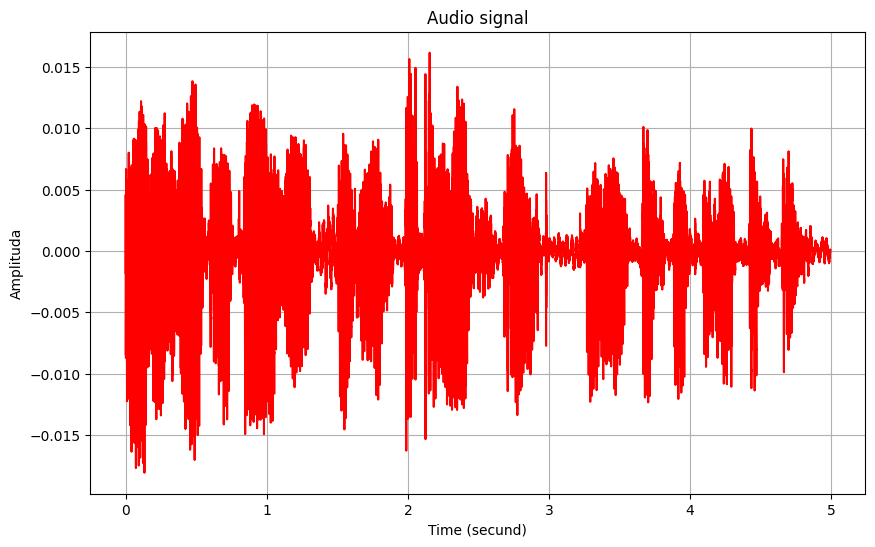

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


def segment_audio(audio_file, top_db=20):
    # Audio faylni yuklab olish
    y, sr = librosa.load(audio_file)

    # Ovozning shoqindan tozalash miqdori (decibels)
    noisiness = librosa.effects.split(y, top_db=top_db)

    # Segmentlarni ajratib olish
    segments = []
    for interval in noisiness:
        start, end = interval
        segment = y[start:end]
        segments.append(segment)

    return segments


# Audio faylni segmentlarga bo'lib ajratish
audio_file = "recorded_audio.wav"
segments = segment_audio(audio_file)

# Segmentlarning uzunligini hisoblash
for i, segment in enumerate(segments):
    duration = len(segment) / sr  # Audio segment uzunligini sekundda hisoblash
    print(f"Segment {i+1}: Davomiligi = {duration} sekund")

# Audio signalning uzunligi
audio_length = len(y)

# Vaqtni o'z ichiga olgan massiv
time = np.arange(0, audio_length) / sr

# Ovozning amplitudasi va vaqtni grafikda chiqarish
plt.figure(figsize=(10, 6))
plt.plot(time, y, color="red")
plt.title("Audio signal")
plt.xlabel("Time (secund)")
plt.ylabel("Amplituda")
plt.grid(True)
plt.show()

In [15]:
import librosa
import numpy as np

def calculate_energy(spectrogram):
    # Spektrogramning karralari
    magnitudes = np.abs(spectrogram)
    
    # Energia hisoblanishi
    energy = np.sum(magnitudes**2)
    
    return energy

# Audio faylni yuklab olish
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Spektrogramning olinishi
S = np.abs(librosa.stft(y))

# Spektrogramning energiya hajmini hisoblash
energy = calculate_energy(S)
print("Signalning energiya hajmi:", energy)


Signalning energiya hajmi: 1621.8066


Signalning energiya hajmi: 1621.8066


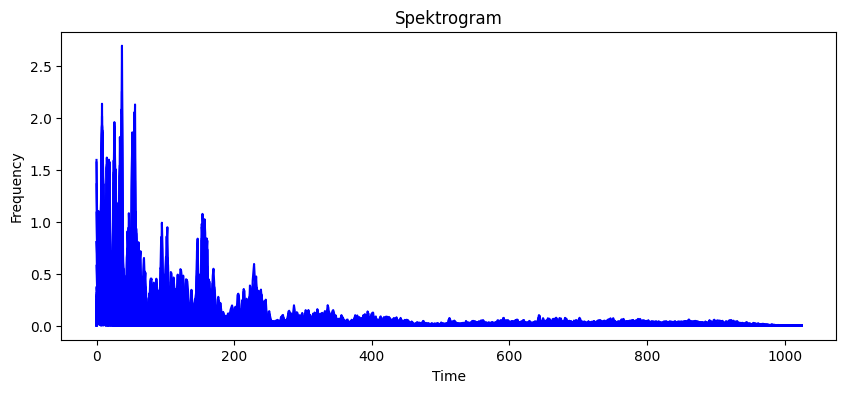

In [46]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

#  Audio faylni yuklash
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Audio faylni ovoz signaliga aylantirish
S = np.abs(librosa.stft(y))

# Spektrogramning energiya hajmini hisoblash
def calculate_energy(spectrogram):
    magnitudes = np.abs(spectrogram)
    energy = np.sum(magnitudes ** 2)
    return energy

# Filtrlashning energiya hajmini o'lchash
energy = calculate_energy(S)
print("Signalning energiya hajmi:", energy)

# Grafikni chiqarish
plt.figure(figsize=(10, 4))
plt.plot(S, color='blue')
plt.title('Spektrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()




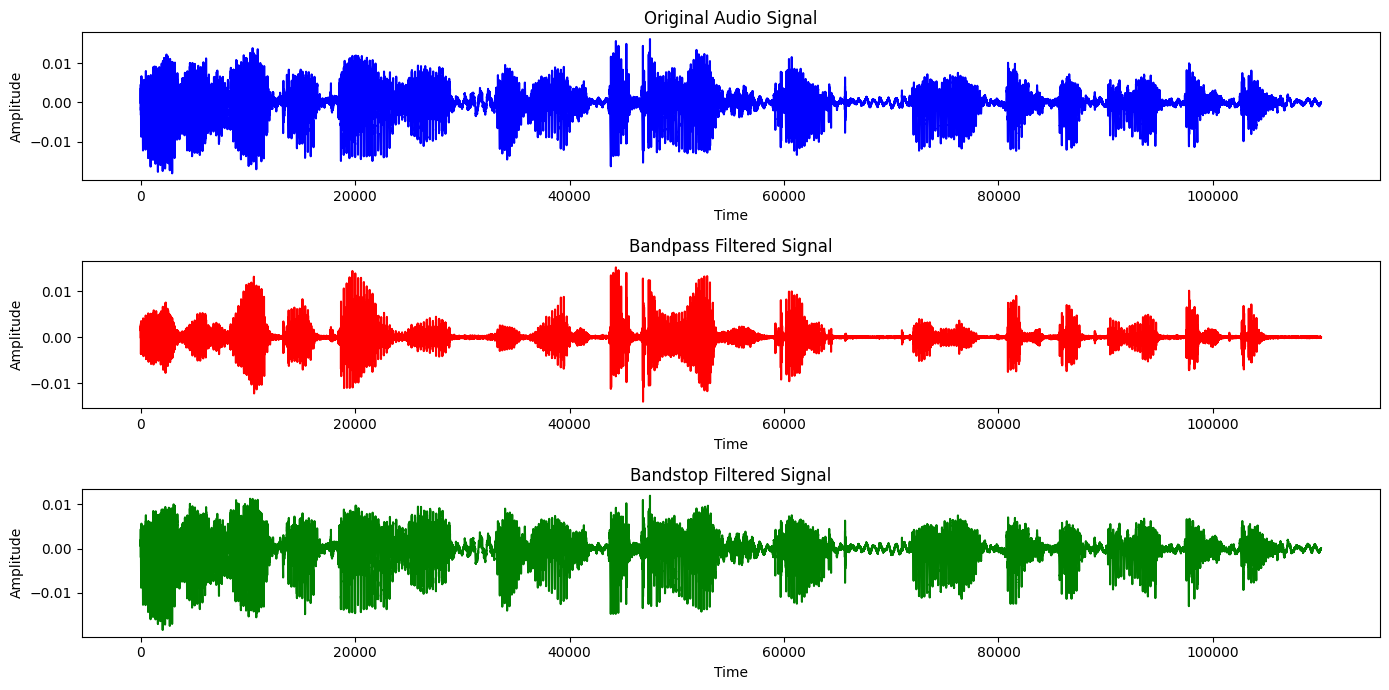

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Audio faylni yuklash (masalan, 'recorded_audio.wav' fayli)
audio_file = "recorded_audio.wav"
y, sr = librosa.load(audio_file)

# Bandpass filtratsiyasi
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Bandstop filtratsiyasi
def butter_bandstop(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    return b, a

def butter_bandstop_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Bandpass filtratsiyasini sinab ko'rish
lowcut_bp = 500  # pastlik chegarasi
highcut_bp = 4000  # yuqori chegarasi
filtered_signal_bp = butter_bandpass_filter(y, lowcut_bp, highcut_bp, sr)

# Bandstop filtratsiyasini sinab ko'rish
lowcut_bs = 1000  # pastlik chegarasi
highcut_bs = 2000  # yuqori chegarasi
filtered_signal_bs = butter_bandstop_filter(y, lowcut_bs, highcut_bs, sr)

# Natijalarni chiqarish
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(y, color='blue')
plt.title('Original Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(filtered_signal_bp, color='red')
plt.title('Bandpass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_bs, color='green')
plt.title('Bandstop Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Tozalangan audio muvaffaqiyatli 'cleaned_audio.wav' faylga saqlandi.


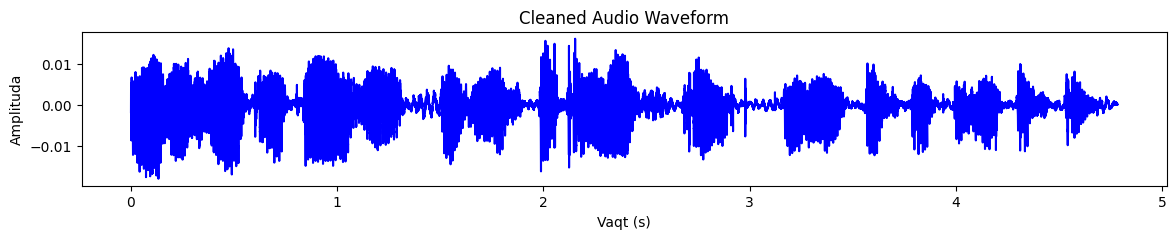

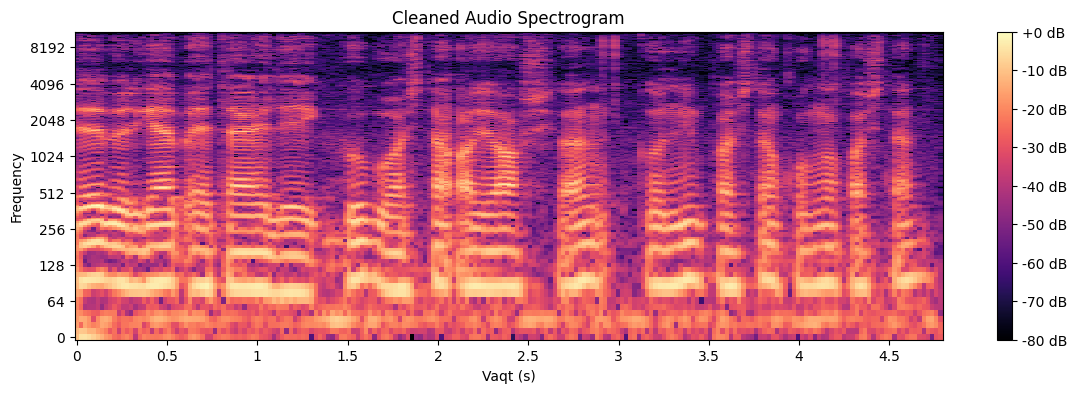

In [64]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io.wavfile import write

def remove_noise(audio_file, top_db=20):
    # Audio faylni yuklash
    y, sr = librosa.load(audio_file)
    
    # Ovozning shoqindan tozalash miqdori (decibels)
    noisiness = librosa.effects.split(y, top_db=top_db)
    
    # Tozalangan ovozni eshitish
    clean_audio = librosa.effects.remix(y, intervals=noisiness)
    
    return clean_audio, sr

def plot_audio_waveform(audio, sr, title="Audio Waveform"):
    # Audio signalni tasvirlash
    plt.figure(figsize=(14, 2))
    plt.plot(np.arange(len(audio)) / sr, audio, color='blue')
    plt.title(title)
    plt.xlabel('Vaqt (s)')
    plt.ylabel('Amplituda')
    plt.show()

def plot_spectrogram(audio, sr, title="Spectrogram"):
    # Spectrogramni hisoblash
    S = np.abs(librosa.stft(audio))
    spectrogram = librosa.amplitude_to_db(S, ref=np.max)
    
    # Spectrogramni tasvirlash
    plt.figure(figsize=(14, 4))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Vaqt (s)')
    plt.ylabel('Frequency')
    plt.show()

# Test
audio_file = "recorded_audio.wav"
clean_audio, sr = remove_noise(audio_file)
def save_audio(audio, sr, filename):
    write(filename, sr, audio)

# Test
output_filename = "cleaned_audio.wav"
save_audio(clean_audio, sr, output_filename)
print(f"Tozalangan audio muvaffaqiyatli '{output_filename}' faylga saqlandi.")

plot_audio_waveform(clean_audio, sr, title="Cleaned Audio Waveform")
plot_spectrogram(clean_audio, sr, title="Cleaned Audio Spectrogram")
